In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#checking for missing values 
(df.isnull().sum()/len(df))*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
#Checking for duplicates in the country column
boolean = df.duplicated(subset=['country']).any()
boolean

False

Hence there are no missing values or duplicate values in the data 

The values of imports, exports and health are in percentages of gdpp. Hence we will convert them to actual values. 

In [8]:
df['import']=(df['imports']*df['gdpp'])/100
df['export']=(df['exports']*df['gdpp'])/100
df['health_spend']=(df['health']*df['gdpp'])/100

In [9]:

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,248.297,55.30,41.9174
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1987.740,1145.20,267.8950
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1400.440,1712.64,185.9820
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1514.370,2199.19,100.6050
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,7185.800,5551.00,735.6600


In [10]:
# Now since we have actual values of imports and exports we will drop teh percentage columns   
df.drop(['imports','exports','health'],axis=1,inplace=True)
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,248.297,55.30,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1987.740,1145.20,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1400.440,1712.64,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,1514.370,2199.19,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,7185.800,5551.00,735.6600


In [11]:
df.columns

Index(['country', 'child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'import', 'export', 'health_spend'],
      dtype='object')

# EDA

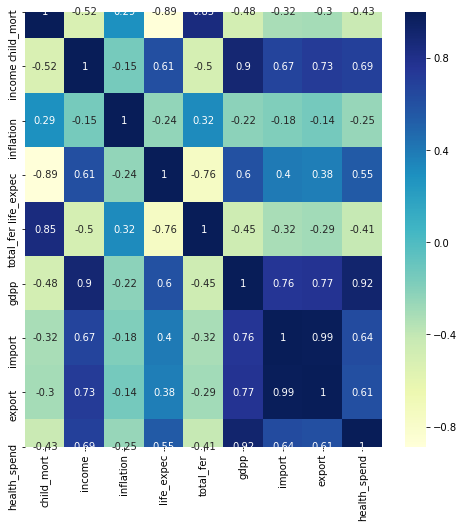

In [12]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")

- there is high positive corelation between imports and exports, gdp per capita and health expenditure,income and gdp per capita,child mortality rate and total fertility, export and income.
- There is a negative corelation between helath expenditure and child mortality rate, child mortality rate and life expectancy, total fertility and life expectancy,income and total fertility, income and child mortality.


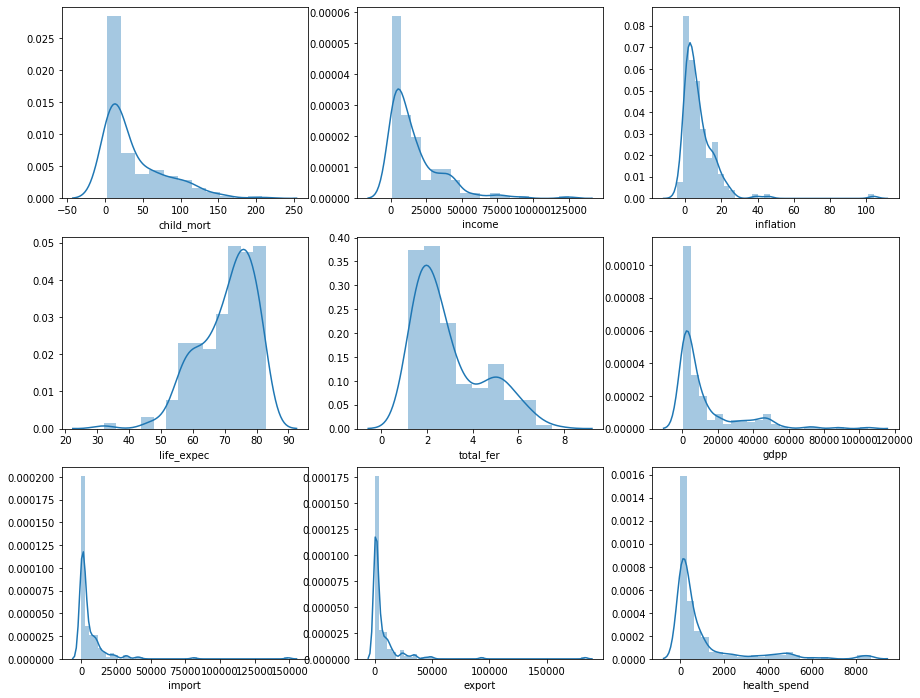

In [13]:
plt.figure(figsize = (15,12))
features=['child_mort', 'income', 'inflation', 'life_expec','total_fer', 'gdpp', 'import', 'export', 'health_spend']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

we can see from the distribution plots that some clusters are present in total_fertility,GDP, income, health spend and child mortality rate. 

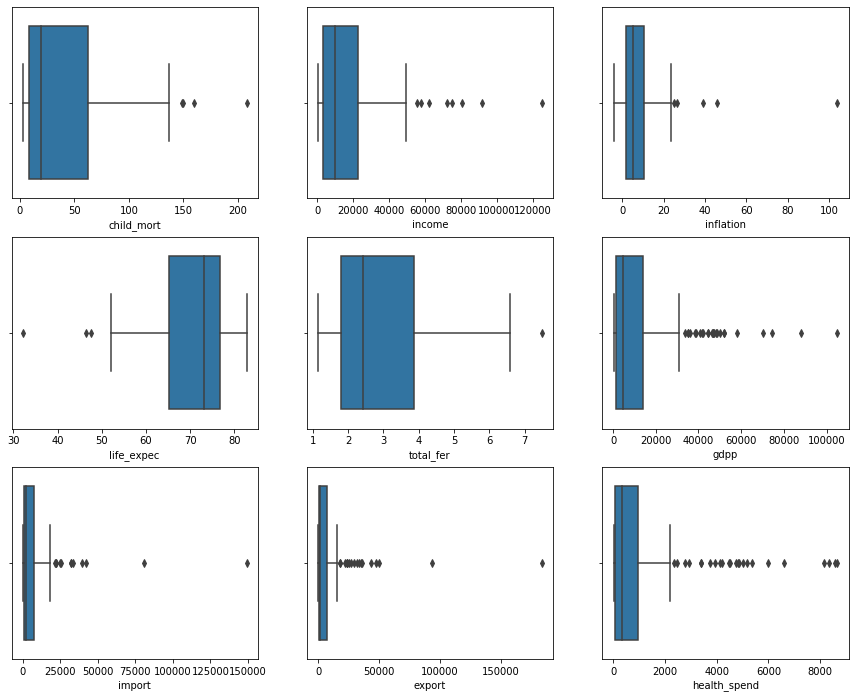

In [14]:
plt.figure(figsize = (15,12))
features=['child_mort', 'income', 'inflation', 'life_expec','total_fer', 'gdpp', 'import', 'export', 'health_spend']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

There are present in all the columns of the data frame.
Since the Data frame has only 167 rows removing outliers would lead to loss of significant data 
Hence a better option would be to cap the outliers.
Also we would not cap the outliers of child mortality and life expectancy as the outliers in these variables are the countries that may need the most aid hence there is no point in capping these fields.

capping of outliers 

In [15]:
q1=df['income'].quantile(0.95)
df['income'][df['income']>=q1]=q1
q2=df['inflation'].quantile(0.95)
df['inflation'][df['inflation']>=q2]=q2
q3=df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer']>=q3]=q3
q4=df['gdpp'].quantile(0.85)
df['gdpp'][df['gdpp']>=q4]=q4
q5=df['import'].quantile(0.92)
df['import'][df['import']>=q5]=q5
q6=df['export'].quantile(0.89)
df['export'][df['export']>=q6]=q6
q7=df['health_spend'].quantile(0.86)
df['health_spend'][df['health_spend']>=q7]=q7

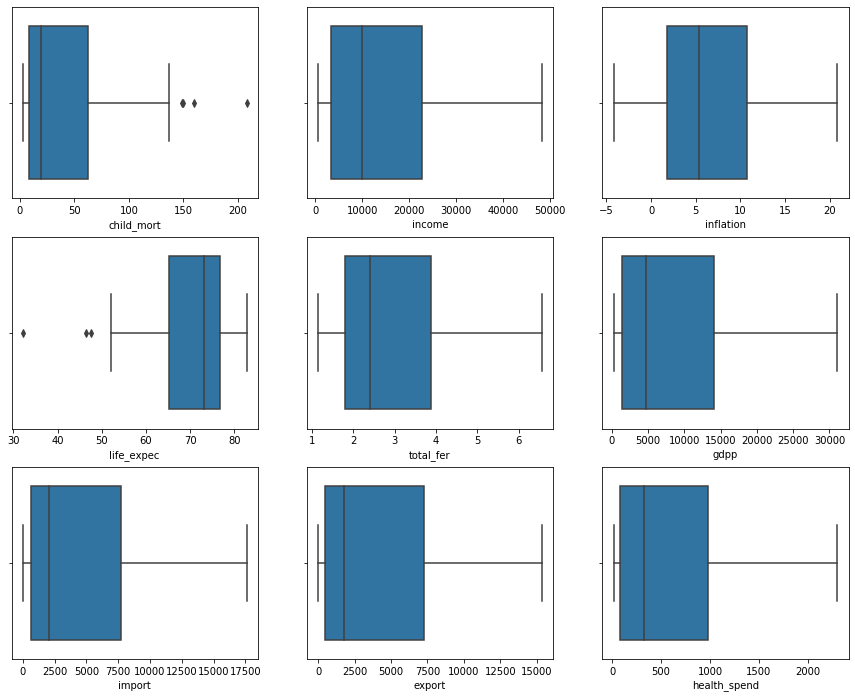

In [16]:
plt.figure(figsize = (15,12))
features_=['income', 'inflation','total_fer', 'gdpp', 'import', 'export', 'health_spend']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

# Hopkins score 

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
df1 = df.copy()
df1 = df1.drop(['country'],axis = 1)
hopkins(df1)

0.884987759756961

- If Hopkins score if good that means you have good data and good clusters can be formed.

# Scaling

In [19]:
# instantiate
scaler = StandardScaler()
# fit_transform
scaled_df = scaler.fit_transform(df1)
scaled_df.shape

(167, 9)

In [20]:
scaled_df= pd.DataFrame(scaled_df)
scaled_df.columns = ['child_mort', 'income', 'inflation', 'life_expec','total_fer', 'gdpp', 'import', 'export', 'health_spend']
scaled_df.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend
0,1.291532,-0.958349,0.394438,-1.619092,1.926396,-0.864244,-0.803809,-0.831603,-0.797818
1,-0.538949,-0.394006,-0.383226,0.647866,-0.865054,-0.542231,-0.489662,-0.626592,-0.514105
2,-0.272833,-0.192552,1.440750,0.670423,-0.034983,-0.508546,-0.595729,-0.519856,-0.616946
3,2.007808,-0.667360,2.190136,-1.179234,2.153997,-0.593215,-0.575153,-0.428335,-0.724136
4,-0.695634,0.227992,-0.862393,0.704258,-0.543736,0.196113,0.449119,0.202145,0.073169


# Modelling

Elbow curve

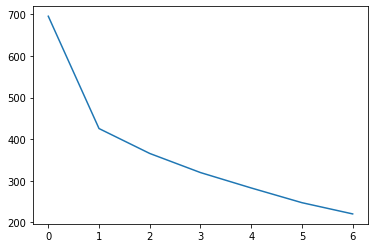

In [21]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df
              )
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [22]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))   

For n_clusters=2, the silhouette score is 0.4885501833124207
For n_clusters=3, the silhouette score is 0.4340687454754467
For n_clusters=4, the silhouette score is 0.32519370392579916
For n_clusters=5, the silhouette score is 0.3270053668953815
For n_clusters=6, the silhouette score is 0.3337366310689569
For n_clusters=7, the silhouette score is 0.3312331383214058
For n_clusters=8, the silhouette score is 0.3165375566784678


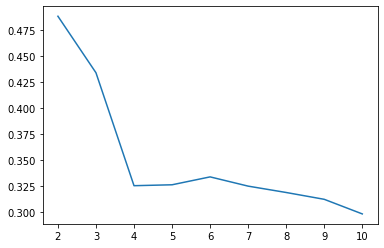

In [23]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

looking at the elbow curve and silhouette score we will opt to for 3 clusters

In [24]:
df_kmeans=scaled_df.copy()

In [25]:
#K=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=500)
kmeans.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=500, tol=0.0001, verbose=0)

In [26]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [27]:
df_k=df.copy()

In [28]:
df_k['cluster_id'] = kmeans.labels_
df_k.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend,cluster_id
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,248.297,55.30,41.9174,1
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1987.740,1145.20,267.8950,0
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1400.440,1712.64,185.9820,0
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530.0,1514.370,2199.19,100.6050,1
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,7185.800,5551.00,735.6600,0


## Examining the clusters on income,gdpp and child_mort

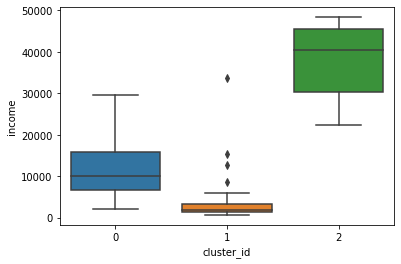

In [29]:
sns.boxplot(x='cluster_id', y='income', data=df_k)
plt.show()

- cluster 0 country have mid range income 
- cluster 1 country have very low incomme 
- cluter 2 countries have very high income 

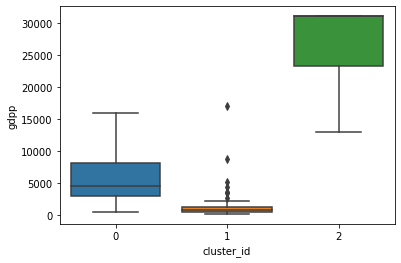

In [30]:
sns.boxplot(x='cluster_id', y='gdpp', data=df_k)
plt.show()

- cluster 0 countries have medium level per capita.
- cluster 1 country have very low income per capita.
    - cluster 2 countries have very high income per capita.

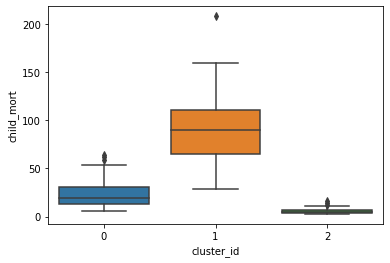

In [31]:
sns.boxplot(x='cluster_id', y='child_mort', data=df_k)
plt.show()

- cluster 0 countries have medium level child mortality rate. 
- cluster 1 country have very high child mortality rate. 
- cluster 2 countries have very low child mortality rate.

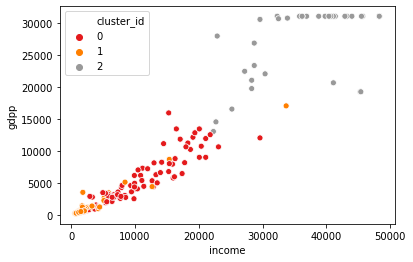

In [32]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_id', data = df_k, palette = 'Set1')

- cluster 1 has low income and low gdpp 
- cluster 0 has medium gdpp and medium income 
- cluster 2 has high gdpp and high income 

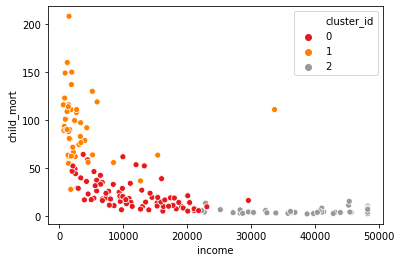

In [33]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = df_k, palette = 'Set1')

- cluster 1 has low income and high child mortality 
- cluster 0 has medium income and medium child mortality
- cluster 2 has high income and low child mortality 

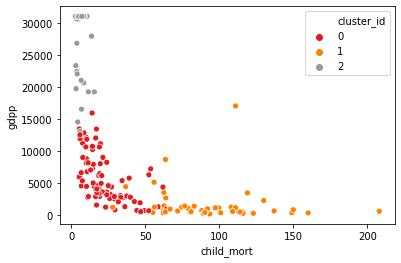

In [34]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = df_k, palette = 'Set1')

- cluster 0 has medium child mortality and gdpp
- cluster 1 has low gdpp and high child mortality 
- cluster 2 has high gdpp and low child mortality 

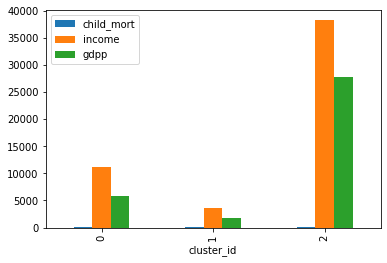

In [35]:
#profiling
df_k.drop(['inflation', 'life_expec','total_fer', 'import', 'export', 'health_spend'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

- cluster 1 has low income and low gdpp 
- cluster 0 has medium gdpp and medium income 
- cluster 2 has high gdpp and high income

## From teh above analysis and visualization we cna conclude that 
- Cluste 1 countries are poor countries that lack resources and may need the most of the aid
- cluster 0 countries are developing countries 
- cluster 2 countries are developed countries that may require the least amount of aid
## Hence we will look into top 5 countries from cluster 1 that the NGO should focus on

In [36]:
#top 5 countries in cluster 1.
df_k[df_k['cluster_id'] == 1].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(5)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend,cluster_id
26,Burundi,93.6,764.0,12.30,57.7,6.2600,231.0,90.552,20.6052,26.7960,1
88,Liberia,89.3,700.0,5.47,60.8,5.0200,327.0,302.802,62.4570,38.5860,1
37,"Congo, Dem. Rep.",116.0,609.0,20.80,57.5,6.5400,334.0,165.664,137.2740,26.4194,1
112,Niger,123.0,814.0,2.55,58.8,6.5636,348.0,170.868,77.2560,17.9568,1
132,Sierra Leone,160.0,1220.0,17.20,55.0,5.2000,399.0,137.655,67.0320,52.2690,1


These 5 are the countries that need the most aid.

# Hierarchical clustering 

In [37]:
scaled_df.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend
0,1.291532,-0.958349,0.394438,-1.619092,1.926396,-0.864244,-0.803809,-0.831603,-0.797818
1,-0.538949,-0.394006,-0.383226,0.647866,-0.865054,-0.542231,-0.489662,-0.626592,-0.514105
2,-0.272833,-0.192552,1.440750,0.670423,-0.034983,-0.508546,-0.595729,-0.519856,-0.616946
3,2.007808,-0.667360,2.190136,-1.179234,2.153997,-0.593215,-0.575153,-0.428335,-0.724136
4,-0.695634,0.227992,-0.862393,0.704258,-0.543736,0.196113,0.449119,0.202145,0.073169


Making dendogram with single and complete linkage 

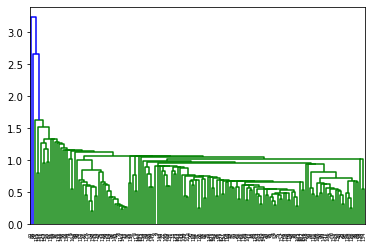

In [38]:
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

This dendogram dosen't help much hence we will try complete linkage

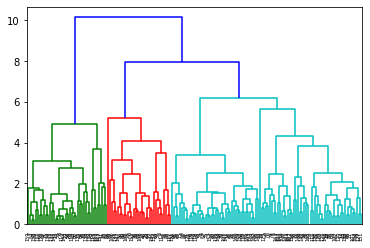

In [39]:
# complete linkage
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From this dedogram we can see that we have 3 clear clusters.Hence we will make three clusters

In [40]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [41]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend,cluster_labels
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,248.297,55.30,41.9174,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1987.740,1145.20,267.8950,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1400.440,1712.64,185.9820,1
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530.0,1514.370,2199.19,100.6050,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,7185.800,5551.00,735.6600,1


Analysing the clusters on the basis of income, gdpp and child_mort

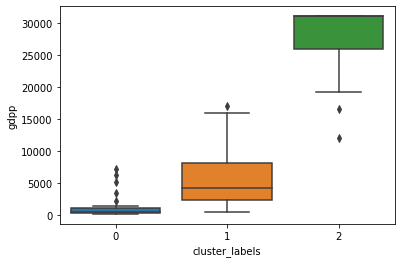

In [42]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df)

- cluster 1 country have mid range gdpp 
- cluster 0 country have very low gdpp 
- cluter 2 countries have very high gdpp

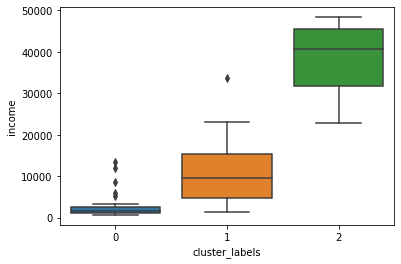

In [43]:
sns.boxplot(x='cluster_labels', y='income', data=df)

- cluster 1 country have mid range income 
- cluster 0 country have very low incomme 
- cluter 2 countries have very high income

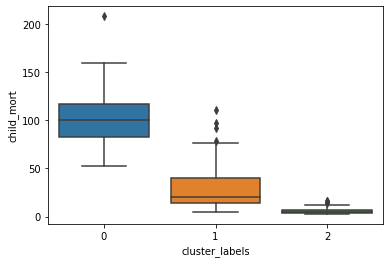

In [44]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

- cluster 1 country have mid range child_mort
- cluster 0 country have very high child_mort 
- cluster 2 countries have very low child_mort

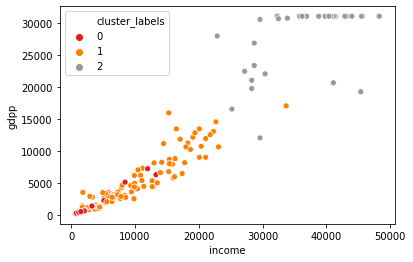

In [45]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_labels', data = df, palette = 'Set1')

- cluster 0 has low income and low gdpp 
- cluster 1 has medium gdpp and medium income 
- cluster 2 has high gdpp and high income

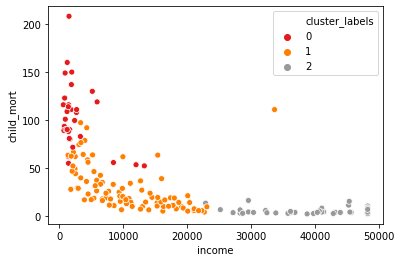

In [46]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_labels', data = df, palette = 'Set1')

- cluster 0 has low income and high child_mort 
- cluster 1 has medium child_mort and medium income 
- cluster 2 has low child_mort and high income

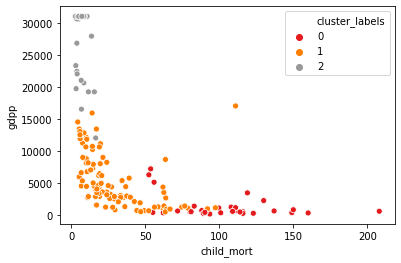

In [47]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_labels', data = df, palette = 'Set1')

- cluster 0 has high child_mort and low gdpp 
- cluster 1 has medium gdpp and medium child_mort 
- cluster 2 has high gdpp and low child_mort

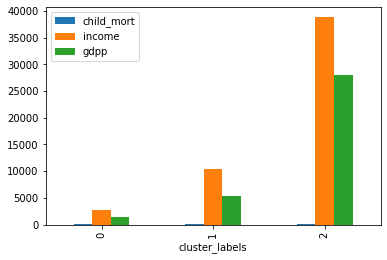

In [48]:
df.drop(['inflation', 'life_expec','total_fer', 'import', 'export', 'health_spend'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

- cluster 0 has low income and low gdpp 
- cluster 1 has medium gdpp and medium income 
- cluster 2 has high gdpp and high income

## From the above analysis and visualization we can conclude that 
- Cluste 0 countries are poor countries that lack resources and may need the most of the aid
- cluster 1 countries are developing countries 
- cluster 2 countries are developed countries that may require the least amount of aid
## Hence we will look into top 5 countries from cluster 0 that the NGO should focus on

In [49]:
df[df['cluster_labels'] == 0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(5)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,import,export,health_spend,cluster_labels
26,Burundi,93.6,764.0,12.30,57.7,6.2600,231.0,90.552,20.6052,26.7960,0
88,Liberia,89.3,700.0,5.47,60.8,5.0200,327.0,302.802,62.4570,38.5860,0
37,"Congo, Dem. Rep.",116.0,609.0,20.80,57.5,6.5400,334.0,165.664,137.2740,26.4194,0
112,Niger,123.0,814.0,2.55,58.8,6.5636,348.0,170.868,77.2560,17.9568,0
132,Sierra Leone,160.0,1220.0,17.20,55.0,5.2000,399.0,137.655,67.0320,52.2690,0


# conclusion and recommendation
we tried both K-means clustering and hierarichal clustering and got similar clusters with the same top 5 countries that the NGO should focus on. The  countries have been clustered into three categories poor, developing and developed. The top 5 countries which need the ost aid in the poor category are :
- Burundi
- Liberia 
- Congo Dem. Rep
- Niger
- Sierra Leone